In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


CNN

In [ ]:
import numpy as np
import cv2
import os
import zipfile
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array


data_dir = '/content/drive/MyDrive/MINI/RIMONE'
# Load the RIM-ONE dataset
def load_images_and_labels(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        for image_filename in os.listdir(label_path):
            img = load_img(os.path.join(label_path, image_filename), target_size=(224, 224))
            img_array = img_to_array(img)
            images.append(img_array)
            if label.lower() == 'glaucoma':
                labels.append(1)  # 1 for glaucoma
            else:
                labels.append(0)  # 0 for normal
    return np.array(images), np.array(labels)


train_data_dir = '/content/drive/MyDrive/MINI/RIMONE/Training'
test_data_dir = '/content/drive/MyDrive/MINI/RIMONE/Testing'

X_train, y_train = load_images_and_labels(train_data_dir)
X_test, y_test = load_images_and_labels(test_data_dir)

X_train = X_train / 255.0  # Normalize and add channel dimension
X_test = X_test / 255.0

# One-hot encode labels for CNN training
y_train_cat = to_categorical(y_train)

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the CNN model
cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y_train)), activation='softmax')
])

cnn.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

# Train the CNN model
cnn.fit(X_train, y_train_cat, epochs=25, validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 26, 26, 128)      

In [ ]:
cnn.evaluate(X_test, to_categorical(y_test))
print("Accuracy:" + str(cnn.evaluate(X_test, to_categorical(y_test))[1]))

6/6 [==============================] - 4s 719ms/step - loss: 0.7658 - accuracy: 0.8103
Accuracy:0.8103448152542114


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


BiLSTM

In [ ]:
import numpy as np
import cv2
import os
import zipfile
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array


data_dir = '/content/drive/MyDrive/MINI/RIMONE'
# Load the RIM-ONE dataset
def load_images_and_labels(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        for image_filename in os.listdir(label_path):
            img = load_img(os.path.join(label_path, image_filename), target_size=(224, 224))
            img_array = img_to_array(img)
            images.append(img_array)
            if label.lower() == 'glaucoma':
                labels.append(1)  # 1 for glaucoma
            else:
                labels.append(0)  # 0 for normal
    return np.array(images), np.array(labels)


train_data_dir = '/content/drive/MyDrive/MINI/RIMONE/Training'
test_data_dir = '/content/drive/MyDrive/MINI/RIMONE/Testing'

X_train_lstm, y_train_lstm = load_images_and_labels(train_data_dir)
X_test_lstm, y_test_lstm = load_images_and_labels(test_data_dir)

X_train_lstm = X_train_lstm / 255.0  # Normalize and add channel dimension
X_test_lstm = X_test_lstm / 255.0

# One-hot encode labels for CNN training
y_train_cat = to_categorical(y_train_lstm)

In [ ]:
X_train_flattened = X_train_lstm.reshape(X_train_lstm.shape[0], X_train_lstm.shape[1], -1)
X_test_flattened = X_test_lstm.reshape(X_test_lstm.shape[0], X_test_lstm.shape[1], -1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout

# Build BiLSTM model
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train_flattened.shape[1], X_train_flattened.shape[2])),
    Dropout(0.5),
    LSTM(32),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_flattened, y_train_lstm, epochs=25, batch_size=32, validation_data=(X_test_flattened, y_test_lstm))

Epoch 1/25
10/10 [==============================] - 14s 779ms/step - loss: 0.6667 - accuracy: 0.5949 - val_loss: 0.6340 - val_accuracy: 0.6782
Epoch 2/25
10/10 [==============================] - 8s 789ms/step - loss: 0.6900 - accuracy: 0.6174 - val_loss: 0.6340 - val_accuracy: 0.6782
Epoch 3/25
10/10 [==============================] - 7s 633ms/step - loss: 0.6788 - accuracy: 0.5949 - val_loss: 0.6381 - val_accuracy: 0.6782
Epoch 4/25
10/10 [==============================] - 7s 745ms/step - loss: 0.6670 - accuracy: 0.6206 - val_loss: 0.6304 - val_accuracy: 0.6782
Epoch 5/25
10/10 [==============================] - 7s 704ms/step - loss: 0.6603 - accuracy: 0.6367 - val_loss: 0.6338 - val_accuracy: 0.6782
Epoch 6/25
10/10 [==============================] - 8s 788ms/step - loss: 0.6660 - accuracy: 0.6334 - val_loss: 0.6361 - val_accuracy: 0.6782
Epoch 7/25
10/10 [==============================] - 7s 690ms/step - loss: 0.6530 - accuracy: 0.6495 - val_loss: 0.6361 - val_accuracy: 0.6782
Epoch

In [ ]:
model.evaluate(X_test_flattened, y_test_lstm)
print("Accuracy:" + str(model.evaluate(X_test_flattened, y_test_lstm)[1]))
model.save('bilstm_model.h5')

6/6 [==============================] - 1s 164ms/step - loss: 0.6458 - accuracy: 0.6782
Accuracy:0.6781609058380127


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Text(0.5, 0, 'Epoch')

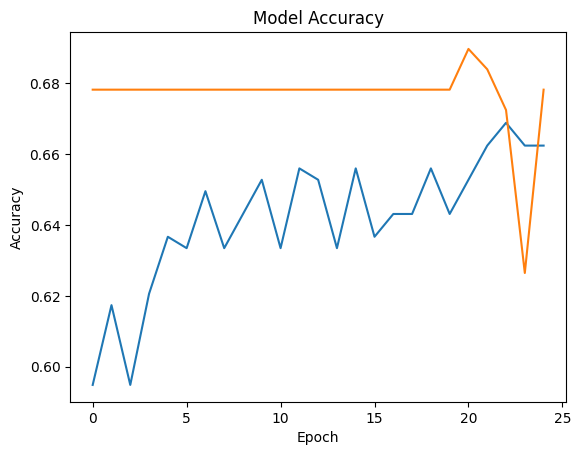

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

COMINED CNN + BiLSTM

In [ ]:
from tensorflow.keras.layers import Concatenate

# Combine the outputs of the two models
combined_input = Concatenate()([cnn.output, model.output])

# Add a dense layer for the final classification
x = Dense(64, activation='relu')(combined_input)
x = Dense(1, activation='sigmoid')(x)

# Final hybrid model


hybrid_model = Model(inputs=[cnn.input, model.input], outputs=x)
hybrid_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist= hybrid_model.fit([X_train, X_train_flattened], y_train, epochs=19, batch_size=32, validation_data=([X_test, X_test_flattened], y_test))



Epoch 1/19
10/10 [==============================] - 59s 5s/step - loss: 0.6864 - accuracy: 0.6013 - val_loss: 0.6656 - val_accuracy: 0.7701
Epoch 2/19
10/10 [==============================] - 48s 5s/step - loss: 0.6308 - accuracy: 0.9003 - val_loss: 0.6233 - val_accuracy: 0.7989
Epoch 3/19
10/10 [==============================] - 48s 5s/step - loss: 0.5822 - accuracy: 0.9100 - val_loss: 0.5958 - val_accuracy: 0.7874
Epoch 4/19
10/10 [==============================] - 50s 5s/step - loss: 0.5400 - accuracy: 0.9228 - val_loss: 0.5721 - val_accuracy: 0.7816
Epoch 5/19
10/10 [==============================] - 51s 5s/step - loss: 0.5109 - accuracy: 0.9132 - val_loss: 0.5451 - val_accuracy: 0.8046
Epoch 6/19
10/10 [==============================] - 48s 5s/step - loss: 0.4844 - accuracy: 0.9100 - val_loss: 0.5346 - val_accuracy: 0.7989
Epoch 7/19
10/10 [==============================] - 48s 5s/step - loss: 0.4461 - accuracy: 0.9293 - val_loss: 0.5219 - val_accuracy: 0.7874
Epoch 8/19
10/10 [==

In [ ]:
print("Accuracy:", hist.history['accuracy'][-1])
print("Loss:", hist.history['loss'][-1])

Accuracy: 0.9260450005531311
Loss: 0.2959305942058563


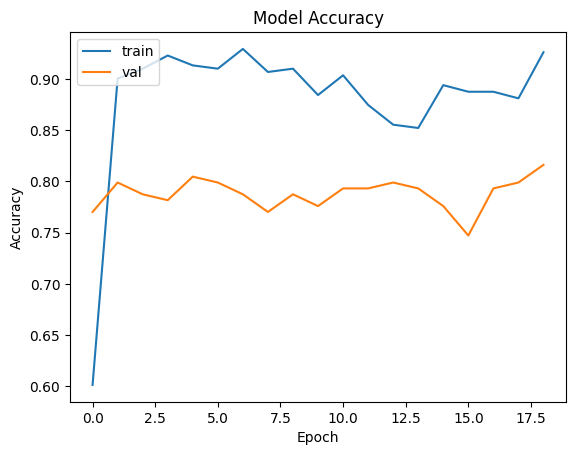

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()